# L-systems


In [1]:
from pgljupyter import *

# Fractals

## The peano curve

Reproduce the following rule and generate the resulting fractal shape until iteration 3.

![peanocurve](./img/peanocurve.png)



In [2]:
%%lpy -w 5

Axiom: -(90) F G F
derivation length: 3
production: # en bas
F --> F(1) +(45) F(0.1) +(45) F(1) -(90) F(1) -(90) F(1)
G --> -(45) G(0.1) -(45) G(0.85) +(45) G(0.1)

LsystemWidget(derivationLength=4, is_magic=True, scene={'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5RPVVde```be\x08…

## The cantor dust

Reproduce the following rule and generate the resulting fractal shap euntil iteration 3.

![cantordust](./img/cantordust.png)


In [3]:
%%lpy
Axiom: -(90) f(-0.5) F(1)
derivation length: 3
production:
F(1) --> F(1) f(1) F(1)

LsystemWidget(derivationLength=4, is_magic=True, scene={'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5RPVVde```be\x08…

## Hilbert curve in 3D

In [19]:
%%lpy -w 40 -a True
Axiom: A
context().turtle.setAngleIncrement(90)

derivation length: 4
production:

A  --> B-F+CFC+F-D&F^D-F+&&CFC+F+B// 
B  --> A&F^CFB^F^D^^-F-D^|F^B|FC^F^A// 
C  --> |D^|F^B-F+C^F^A&&FA&F^C+F+B^F^D// 
D  --> |CFB-F+B|FA&F^A&&FB-F+B|FC// 

interpretation:
A --> ,(2)
B --> ,(3)
C --> ,(4)
D --> ,(5)


LsystemWidget(animate=True, derivationLength=5, is_magic=True, scene={'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5R…

## Barnley Fern 

Try to construct the barnley fern model.
Modify the R value and the angle to achieve other shape.

![fern](./img/barnleyfern.png)
![fern](./img/barnleyfern-construction.png)


In [20]:
%%lpy -w 20 -a True

s_top = 2/3 
s_lat = 1/2 
Axiom: _(0.01) ,(2) A(1)
derivation length: 8
production:
A(s) --> F(s) [+A(s*s_lat)] - (5)F(s)[/(180)+A(s*s_lat)] - (5) A(s*s_top)


LsystemWidget(animate=True, derivationLength=9, is_magic=True, scene={'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5R…

## Broccoli

Generate a broccoli shape:

Each node has 4 lateral children internode and an apical one.
   - Insertion angle for lateral: 40 
   - 90 degree between each lateral children
Width depends on the order of ramification
Scaling factor of 0.5 between each order
Finish structure with sphere with size double from terminal internode

![broccoli](./img/broccoli.png)

In [ ]:
%%lpy -w 6 -a True
a = 40
def nextscale(s) :  return s/2.
Axiom: ,(2) _(0.3) F(1, 0.25) A(1) 
production:
derivation length:6
A(s) :
        produce A(nextscale(s))
interpretation:
A(s) --> @O(2*s)

## Continuous development

Growth of organs is simulated using a logistic function (Cookson et al., 2007).

<center>$\frac{L}{1 + \exp{-\frac{t-tip}{b}}}$</center>

In [22]:
from math import exp

def growth_logistic(t, L, tip, b):
    return 

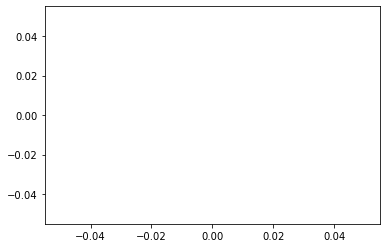

In [23]:
import matplotlib.pyplot as plt
from numpy import arange
b = 0.15
tip = 0.5
L= 10

t = arange(0,1,0.01)
l = list(map(lambda t : growth_logistic(t,L,tip,b), t))
plt.plot(t,l)
plt.show()

Change the theoritical example where all organs growth linearly so that allorgans growth using the logistic.

In [9]:
%%lpy -w 10 -a True

phyllochrone = 1
Li = 0.5
Lf = 1
dt = 0.01

tip = phyllochrone/2
b_i = 0.15
b_l = 0.3

Axiom:  I(0) L(0) A(0)
derivation length: 600
production:
A(t): 
    if t > phyllochrone : produce /(137.5)I(0) L(0) A(0)
    else: produce A(t+dt)

I(t) --> I(t+dt)
L(t) --> L(t+dt)

interpretation:
I(t) --> F(min(phyllochrone,t) * Li)
L(t) --> [&(60*min(1,t)),(2) ~l(min(phyllochrone,t)*Lf)]


LsystemWidget(animate=True, derivationLength=601, is_magic=True, scene={'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe…

# Random trees

Generate a tree such as a the end of each segment, a random number of lateral segment children (between 2 and 4) are generated.
  - Insertion angle: 60
  - Divergence angle between segments at the same node: proportionnal to number of segments i.e. 360/nb

![randomtree](./img/randomtree.png)

In [10]:
%%lpy -w 10 -a True
from random import *
module Segment
dl = 0.5
ds = 0.1
Axiom: A

derivation length: 6
production:

A --> Segment(1)[+(30) A][-(30) A]

interpretation:

A --> [,(3) @O(0.15) ]
Segment(l) --> nF(l,ds)
endlsystem

LsystemWidget(animate=True, derivationLength=7, is_magic=True, scene={'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5R…

## Random patterns

Implement the following Lsystem:

![markov2](./img/markov2.png)

with the given table of probabilities

|    |   A  |    B  |
|----|------|-------|
| A  | 0.75 |  0.25 |
| B  | 0.25 |  0.75 |

Estimate the total probability to branch with the formula

<center>$p_{br} = \frac{p_{AB}}{p_{AB}+p_{BA}}$</center>

In [11]:
%%lpy -w 400 -a True

from random import *
p11 = 0.750000 # probability of staying in a branched node
p00 = 0.250000 # probability of staying in an empty node

Axiom: _(1) S 
derivation length: 100

# x=1 = branching state
# x=0 = non-branching state 

production:
ignore: /
S :
    if random() <= 0.5: produce A
    else : produce B

A : #  branching
    nproduce /(180)I[M]


B :  # non branching
    nproduce I



homomorphism:

M --> ;(2)+F(20)
I --> ;(1)F(2)
A --> ;(1)@O(3)


LsystemWidget(animate=True, derivationLength=101, is_magic=True, scene={'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe…

## Pruning 

In [12]:
%%lpy -a True -w 20
Axiom : A
production:
derivation length: 10

A --> F(1)[-X(3)B][+X(3)B]A
B --> F(1) B
X(0) --> F(0.3)%
X(d) --> X(d-1)

LsystemWidget(animate=True, derivationLength=11, is_magic=True, scene={'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5…

## Positional information

In [13]:
from openalea.lpy.lsysparameters import *
from openalea.plantgl.all import *

In [14]:

l = LsystemParameters()
l.add_function('h', NurbsCurve2D([(0,0.1,1),(1/3,1,1),(2/3,1,1),(1,0,1)]))
l.add_curve('path')
l.add_curve('leaf_path')
l.add_curve('leaf_section', Polyline2D([(-0.5,0),(0.5,0)]))
l.add_function('leaf_width', NurbsCurve2D([(0,0.1,1),(1/3,1,1),(2/3,1,1),(1,0,1)]))


(<functionmanager.FunctionManager at 0x1045dd1f0>,
 NurbsCurve2D(Point3Array([Vector3(0,0.1,1),Vector3(0.333333,1,1),Vector3(0.666667,1,1),Vector3(1,0,1)])))

In [15]:
%%lpy -a True -w 20 -p l
l = 10
dl = 0.5
Axiom : ,(2) SetGuide(path,l) A(0)

derivation length: int(l/dl)
production:

A(cl) --> F(dl) [+(90) L(h(cl)/l)] [^(-90)L(1)] A(cl+dl)

interpretation:
L(ll) --> /(90) Sweep(leaf_path, leaf_section, ll, 0.1, 0.5, leaf_width) 


IndexError: 

IndexError: 

IndexError: 

IndexError: 